<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/prodigy_task_3_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
file_path_1 = "/content/drive/MyDrive/bank marketing/bank-additional-full.csv 1.csv"
file_path_2 = "/content/drive/MyDrive/bank marketing/bank-full.csv 1.csv"


In [ ]:
data_1 = pd.read_csv(file_path_1, sep=';')
data_2 = pd.read_csv(file_path_2, sep=';')

In [ ]:
# Combine the two datasets
data = pd.concat([data_1, data_2])

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95039 entries, 0 to 49731
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             95039 non-null  int64  
 1   job             95039 non-null  object 
 2   marital         95039 non-null  object 
 3   education       95039 non-null  object 
 4   default         95039 non-null  object 
 5   housing         95039 non-null  object 
 6   loan            95039 non-null  object 
 7   contact         95039 non-null  object 
 8   month           95039 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        95039 non-null  int64  
 11  campaign        95039 non-null  int64  
 12  pdays           95039 non-null  int64  
 13  previous        95039 non-null  int64  
 14  poutcome        95039 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   4

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week       49732
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      49732
cons.price.idx    49732
cons.conf.idx     49732
euribor3m         49732
nr.employed       49732
y                     0
balance           45307
day               45307
dtype: int64


In [ ]:
# 1. Fill 'day_of_week' with the mode
data['day_of_week'].fillna(data['day_of_week'].mode()[0], inplace=True)


In [ ]:
# 2. Impute economic indicators with the mean
economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for indicator in economic_indicators:
    data[indicator].fillna(data[indicator].mean(), inplace=True)

In [ ]:
# 3. Impute numerical features 'balance' and 'day' with the median
numerical_features = ['balance', 'day']
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

In [ ]:
# Check if missing values have been handled
print("\nMissing Values after handling:")
print(data.isnull().sum())


Missing Values after handling:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
balance           0
day               0
dtype: int64


In [ ]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                age      duration      campaign         pdays      previous  \
count  95039.000000  95039.000000  95039.000000  95039.000000  95039.000000   
mean      40.516377    258.432149      2.670388    479.756595      0.385084   
std       10.528531    258.276965      2.940562    483.843861      1.679209   
min       17.000000      0.000000      1.000000     -1.000000      0.000000   
25%       32.000000    103.000000      1.000000     -1.000000      0.000000   
50%       39.000000    180.000000      2.000000    245.000000      0.000000   
75%       48.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     63.000000    999.000000    275.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  95039.000000    95039.000000   95039.000000  95039.000000   
mean       0.082166       93.576032     -40.502282      3.621297   
std        1.084159        0.399686       3.193379      1.19747

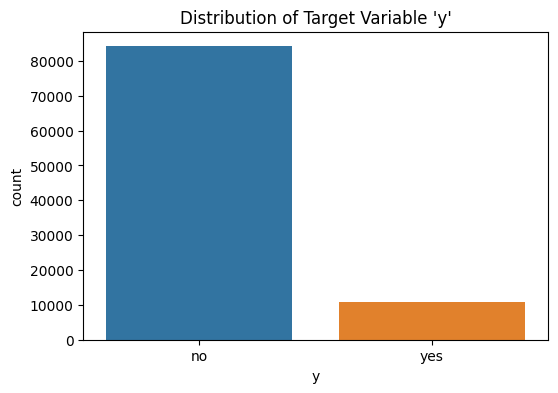

In [ ]:
# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data)
plt.title("Distribution of Target Variable 'y'")
plt.show()

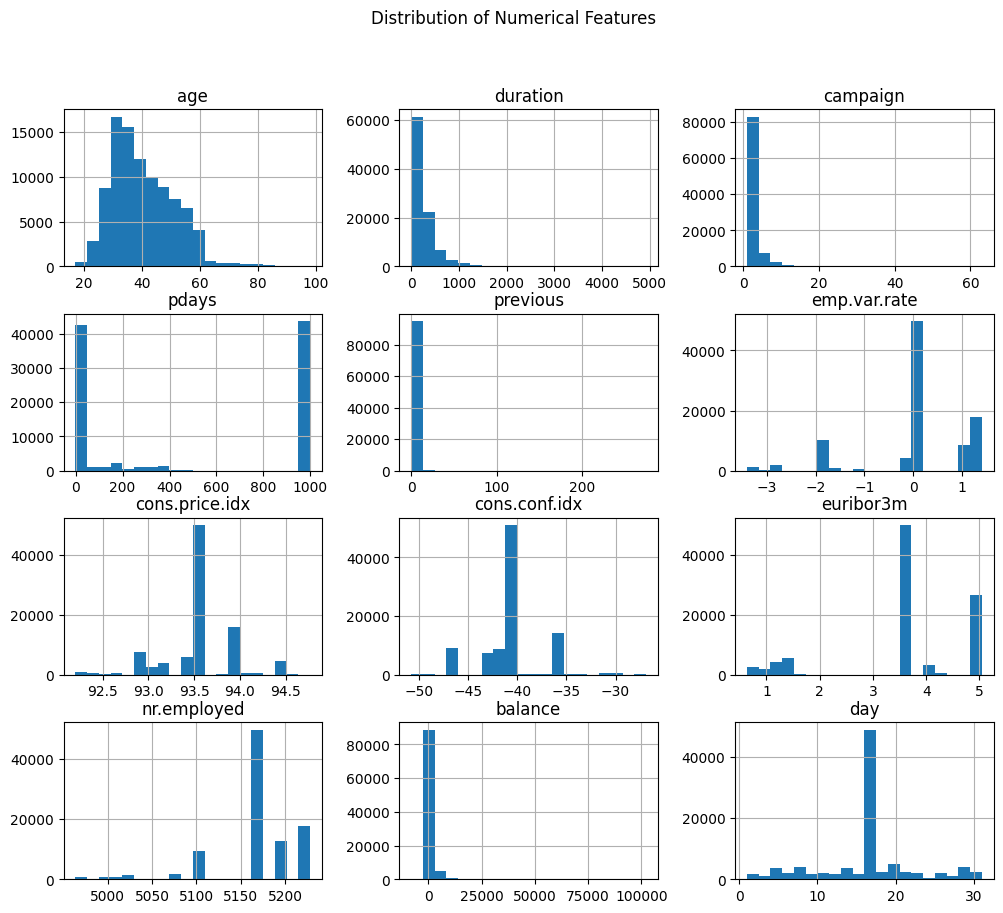

In [ ]:
# Visualize the distribution of numerical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

<ipython-input-15-459c59c1c323>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


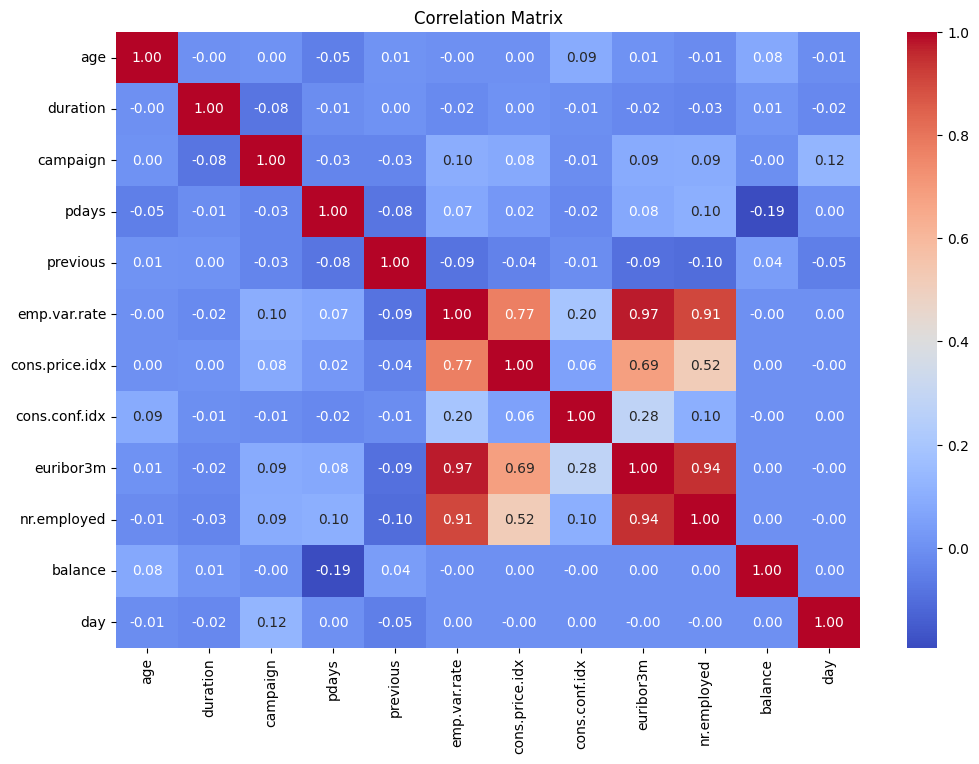

In [ ]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

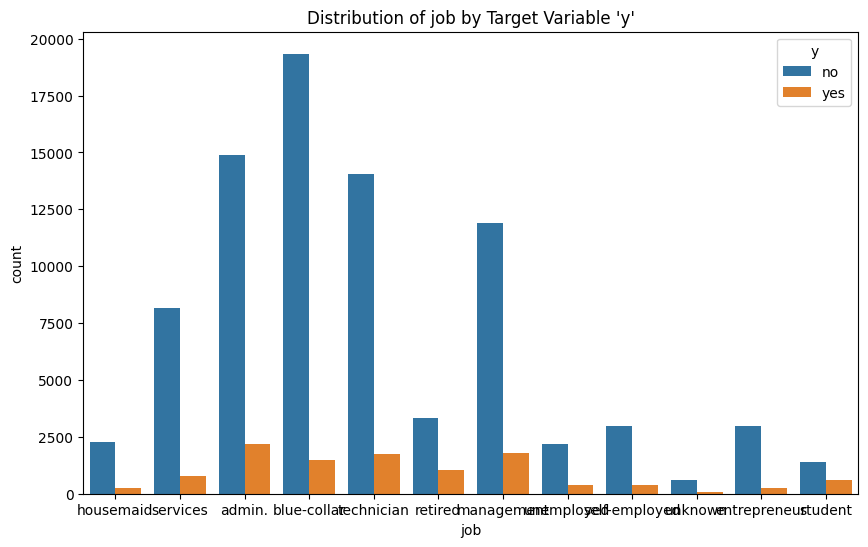

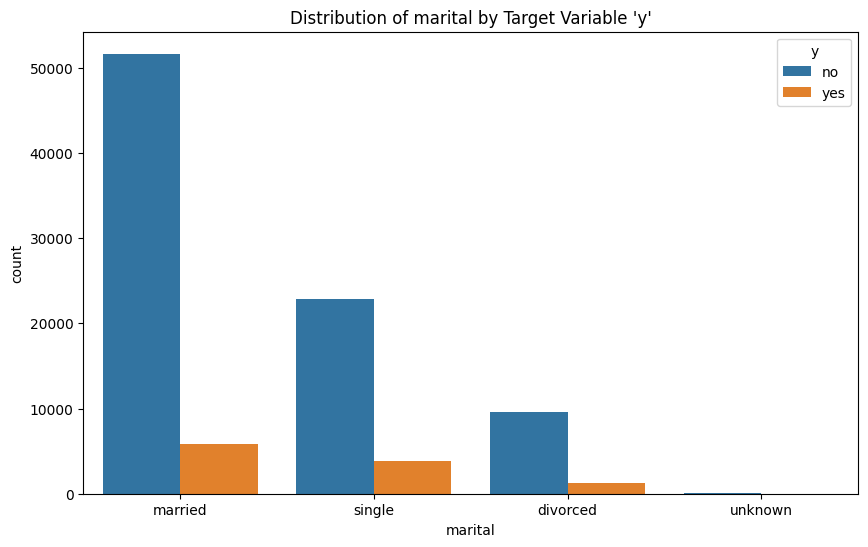

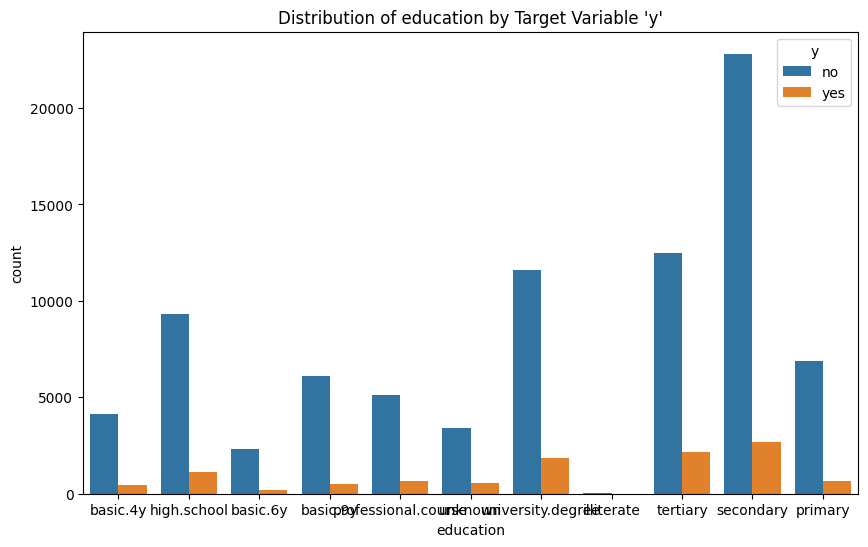

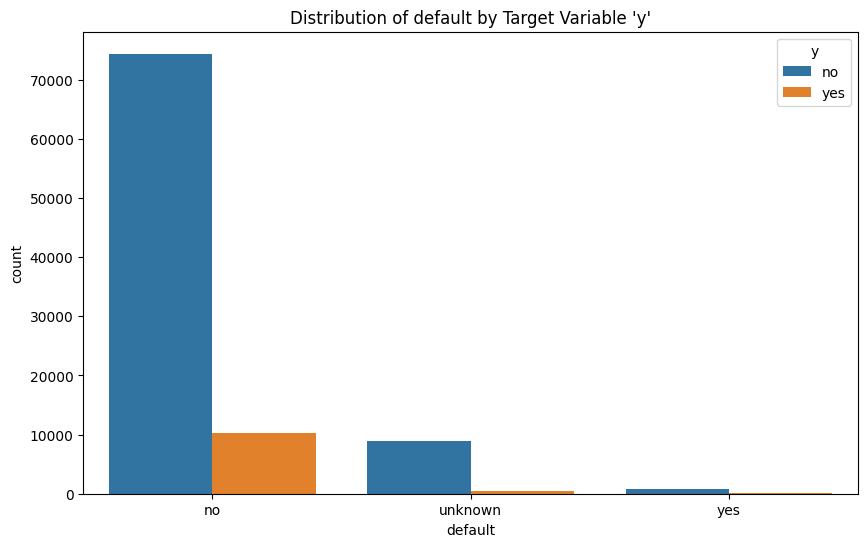

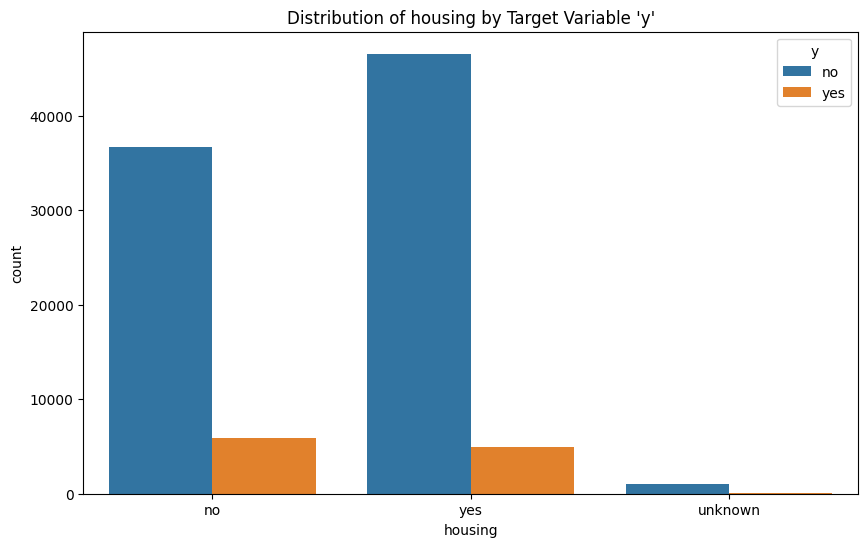

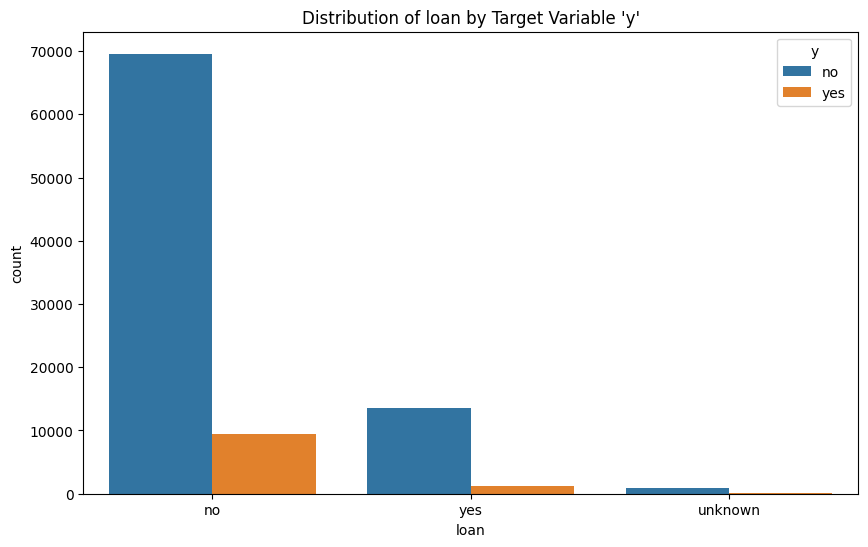

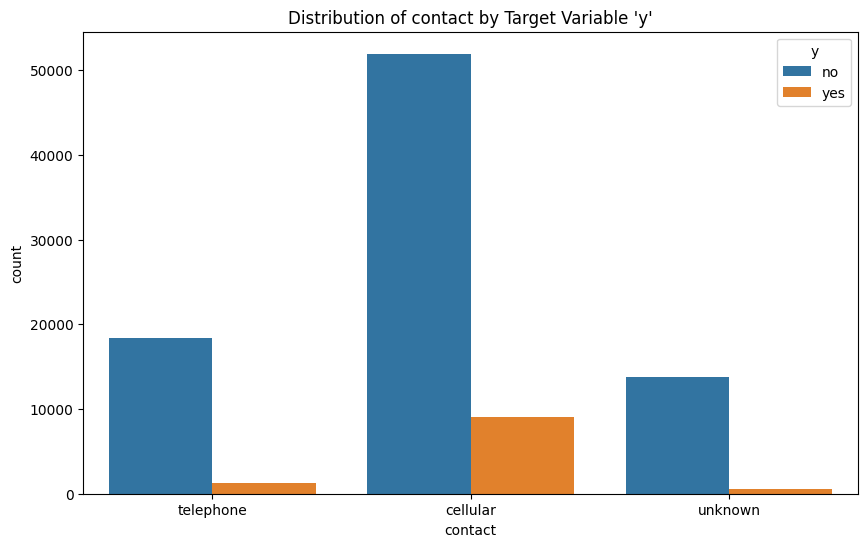

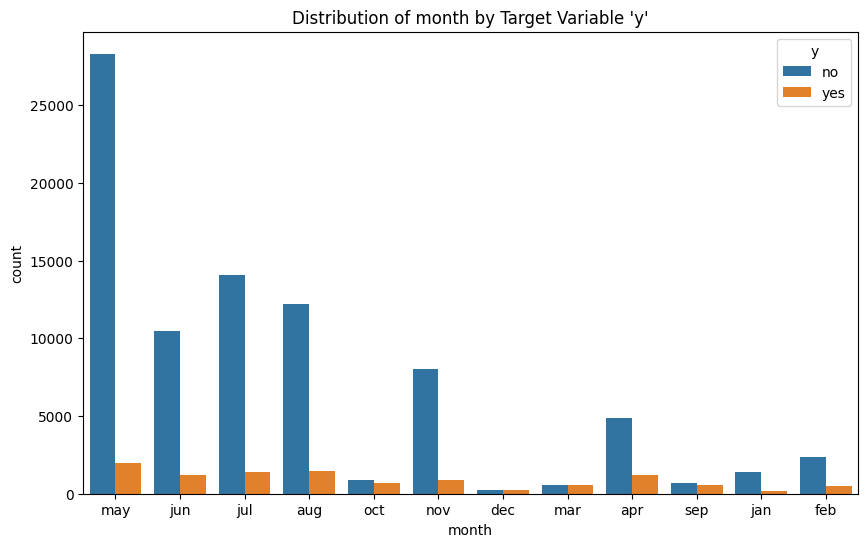

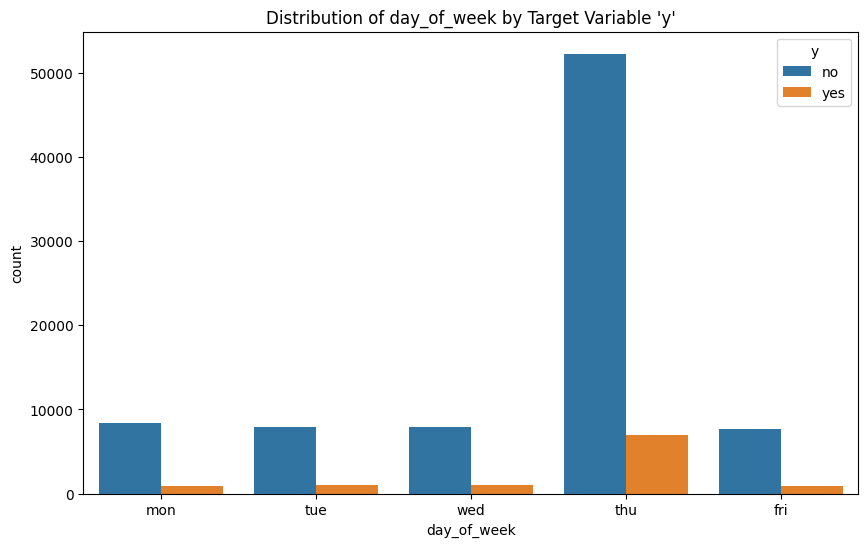

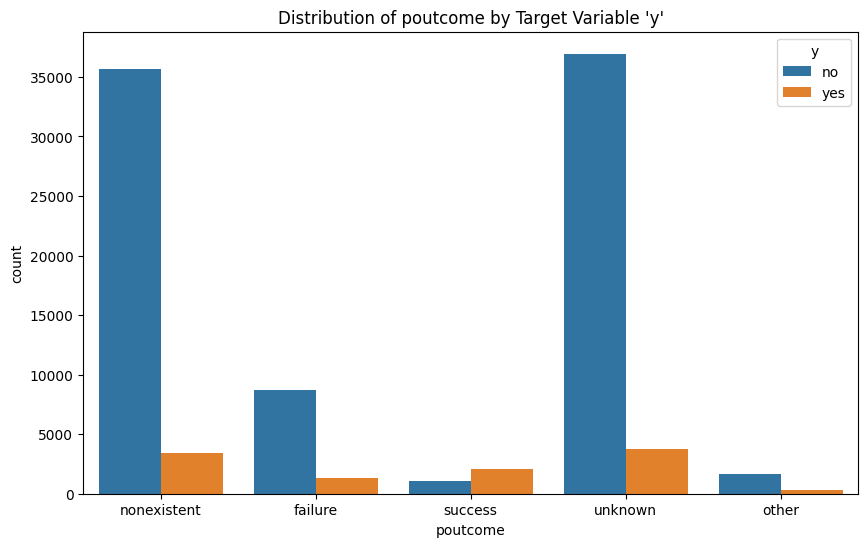

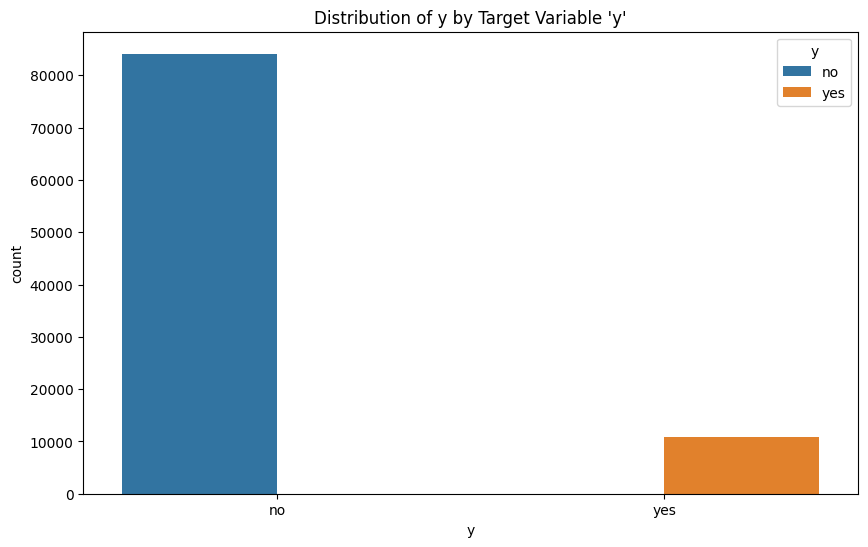

In [ ]:
# Explore categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f"Distribution of {feature} by Target Variable 'y'")
    plt.show()

In [ ]:
# Preprocess the data
X = data.drop('y', axis=1)  # Features
y = data['y']

In [ ]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Text(0.5, 1.0, 'Distribution of Target Classes (Before SMOTE)')

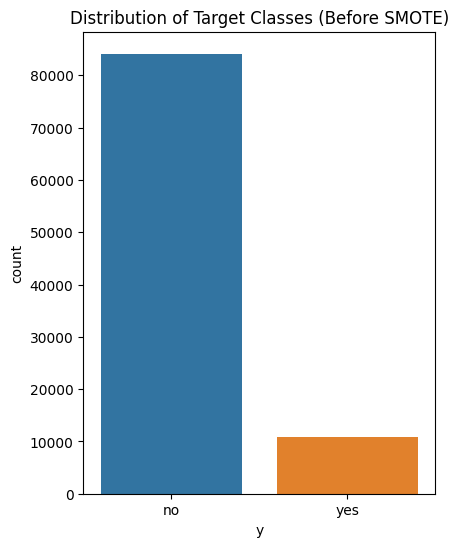

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target classes before and after SMOTE
plt.figure(figsize=(10, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Classes (Before SMOTE)')


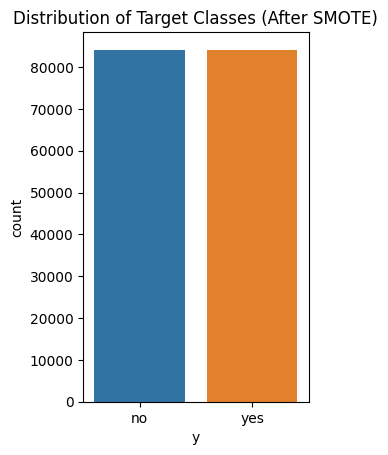

In [ ]:
# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Classes (After SMOTE)')

plt.show()


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Define the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Retrain the model with oversampled data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the model on the testing set
y_pred_best = clf.predict(X_test)
print("Classification Report for the Best Model on Test Set:")
print(classification_report(y_test, y_pred_best))

Classification Report for the Best Model on Test Set:
              precision    recall  f1-score   support

          no       0.94      0.94      0.94     16741
         yes       0.94      0.95      0.94     16915

    accuracy                           0.94     33656
   macro avg       0.94      0.94      0.94     33656
weighted avg       0.94      0.94      0.94     33656



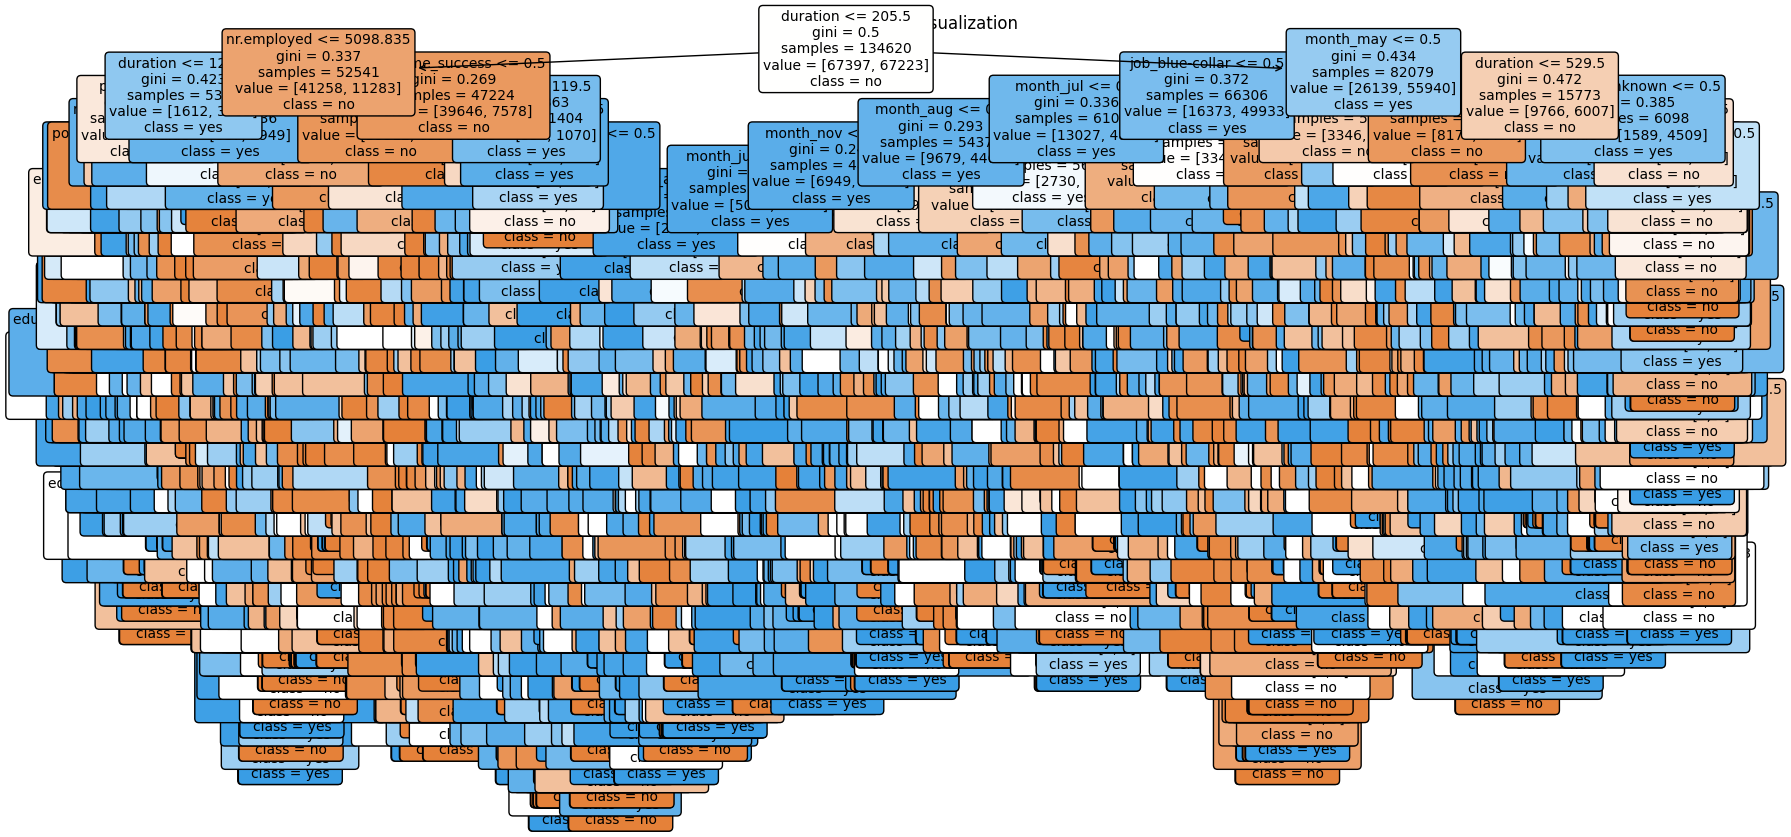

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

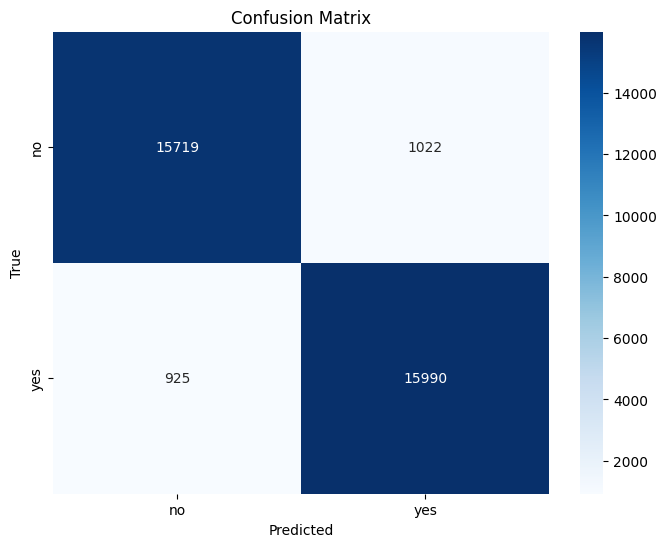

In [ ]:

# Plot confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()